In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors

# visualization style
sns.set_style('whitegrid')
plt.style.use('seaborn-v0_8-whitegrid')

with open('fitness_program.json', 'r', encoding='utf-8') as f:
    fitness_programs = json.load(f)

print(f"Number of {len(fitness_programs)} fitness programs")

first_program_id = list(fitness_programs.keys())[0]
first_program = fitness_programs[first_program_id]
print(f"First program ID: {first_program_id}")
print("Keys in program data:")
print(list(first_program.keys()))

Number of 1500 fitness programs
First program ID: FP000001
Keys in program data:
['title', 'description', 'level', 'goal', 'equipment', 'program_length', 'time_per_workout', 'total_exercises', 'workout_frequency', 'exercise_guidance']


In [2]:
# Now trying on converting to DataFrame for easier analysis
programs_list = []
for program_id, program in fitness_programs.items():
    program_data = {
        'program_id': program_id,
        'title': program['title'],
        'description': program['description'],
        'level': program['level'] if isinstance(program['level'], list) else [program['level']],
        'goal': program['goal'] if isinstance(program['goal'], list) else [program['goal']],
        'equipment': program['equipment'],
        'program_length': program['program_length'],
        'time_per_workout': program['time_per_workout'],
        'total_exercises': program['total_exercises'],
        'workout_frequency': program['workout_frequency'],
    }
    programs_list.append(program_data)

programs_df = pd.DataFrame(programs_list)

# Displays basic information
print(f"DataFrame shape: {programs_df.shape}")
programs_df.head()

DataFrame shape: (1500, 10)


,program_id,title,description,level,goal,equipment,program_length,time_per_workout,total_exercises,workout_frequency
0,FP000001,Advanced Fitness System,Efficient 4-day training split targeting each ...,"[Novice, Beginner, Intermediate]",[General Fitness],Full Gym,14,30,348,4
1,FP000002,Explosive Development Training,Specialized program alternating between heavy ...,"[Beginner, Novice, Intermediate]",[Bodybuilding],Dumbbell Only,4,75,158,4
2,FP000003,EliteLift,Structured 4-day split focusing on strength fo...,"[Novice, Intermediate, Advanced]",[Powerlifting],Garage Gym,8,45,220,4
3,FP000004,4-Day Full Body with Specialization Split,Structured approach to hit each muscle group m...,"[Novice, Intermediate]",[Athletics],Dumbbell Only,13,70,241,4
4,FP000005,Modern General Fitness Protocol,Train upper body twice and lower body twice pe...,"[Advanced, Beginner]",[Athletics],Garage Gym,4,120,151,4


In [3]:
# Basic statistics for numerical features
print("Basic statistics for numerical features:")
numeric_cols = ['program_length', 'time_per_workout', 'total_exercises', 'workout_frequency']
programs_df[numeric_cols].describe()

Basic statistics for numerical features:


,program_length,time_per_workout,total_exercises,workout_frequency
count,1500.000000,1500.000000,1500.000000,1500.000000
mean,8.534667,69.383333,284.453333,4.174000
std,4.615517,26.630982,174.237352,1.083439
min,1.000000,30.000000,15.000000,3.000000
25%,4.000000,45.000000,136.000000,3.000000
50%,8.000000,70.000000,260.000000,4.000000
75%,13.000000,90.000000,419.250000,5.000000
max,16.000000,120.000000,600.000000,6.000000


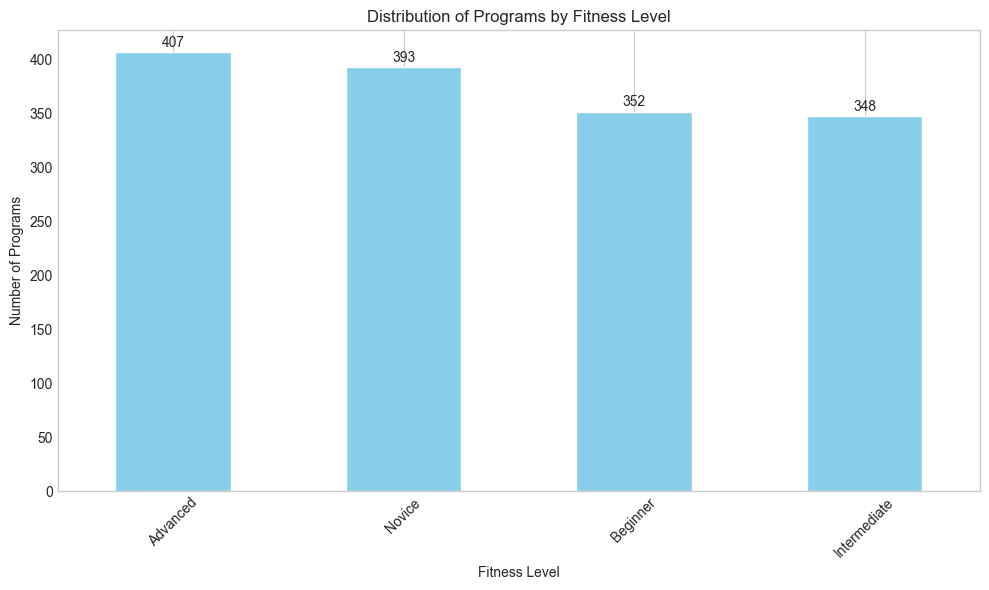

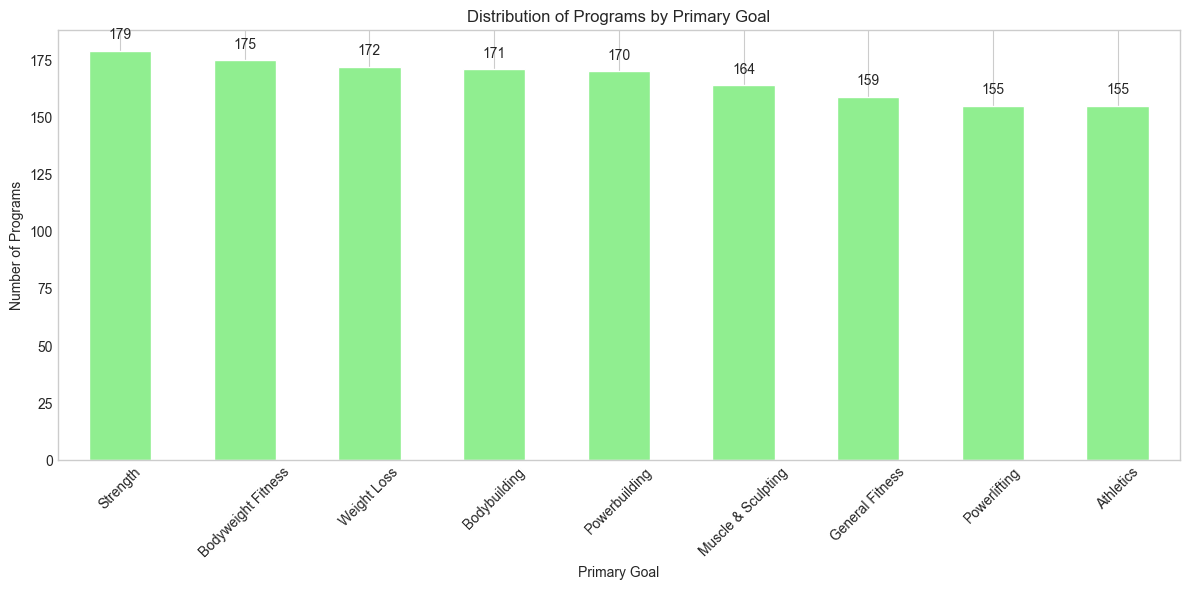

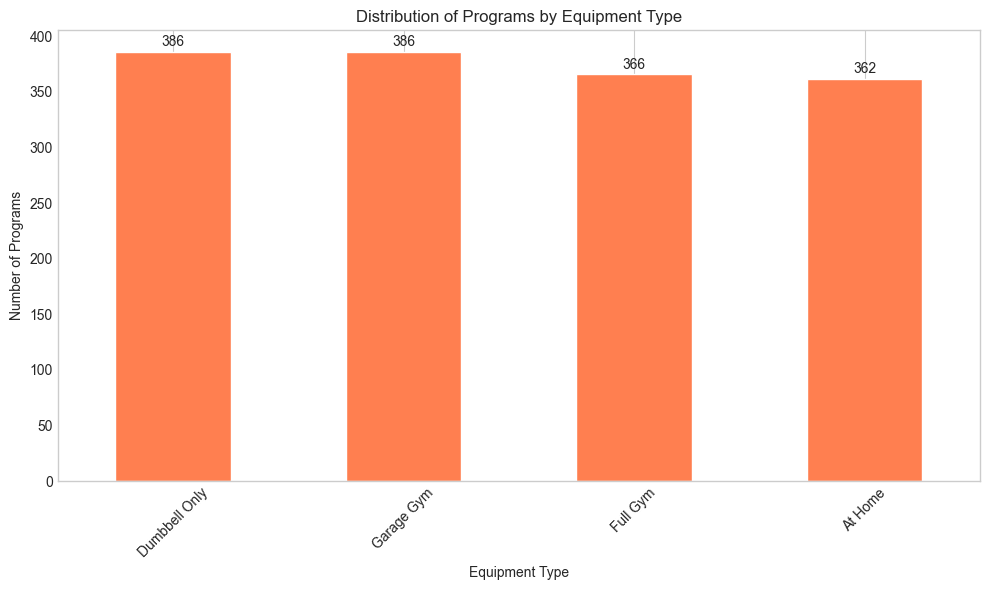

In [4]:
# Now trying to extract primary level for each program
programs_df['primary_level'] = programs_df['level'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Now trying to extracts primary goal for each program
programs_df['primary_goal'] = programs_df['goal'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else x)

# Plot distribution of fitness levels
plt.figure(figsize=(10, 6))
level_counts = programs_df['primary_level'].value_counts()
ax = level_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Programs by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(level_counts):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

# Plot distribution of primary goals
plt.figure(figsize=(12, 6))
goal_counts = programs_df['primary_goal'].value_counts()
ax = goal_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Programs by Primary Goal')
plt.xlabel('Primary Goal')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(goal_counts):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

# Plot distribution of equipment types
plt.figure(figsize=(10, 6))
equipment_counts = programs_df['equipment'].value_counts()
ax = equipment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Programs by Equipment Type')
plt.xlabel('Equipment Type')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(equipment_counts):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

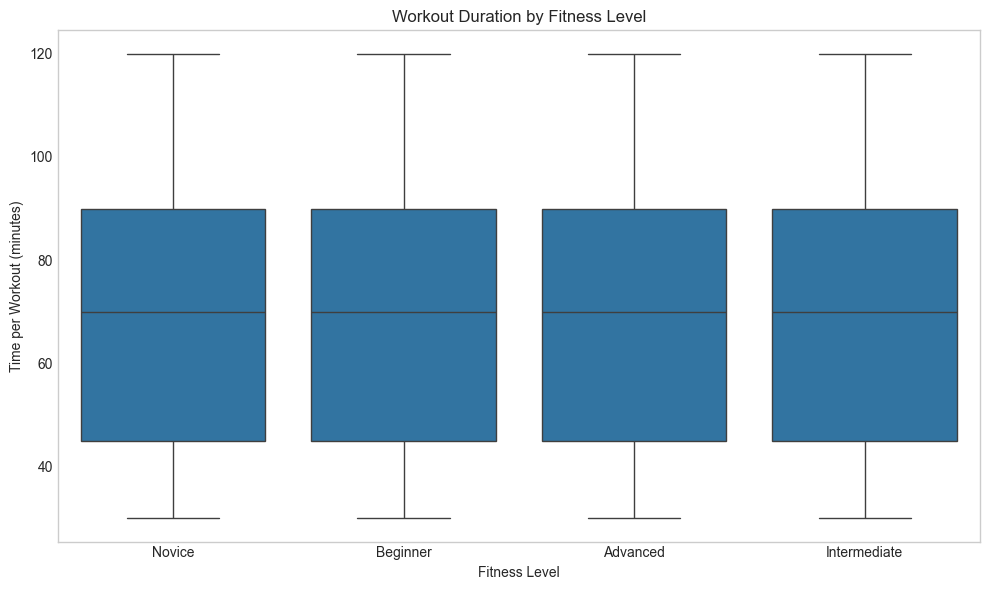

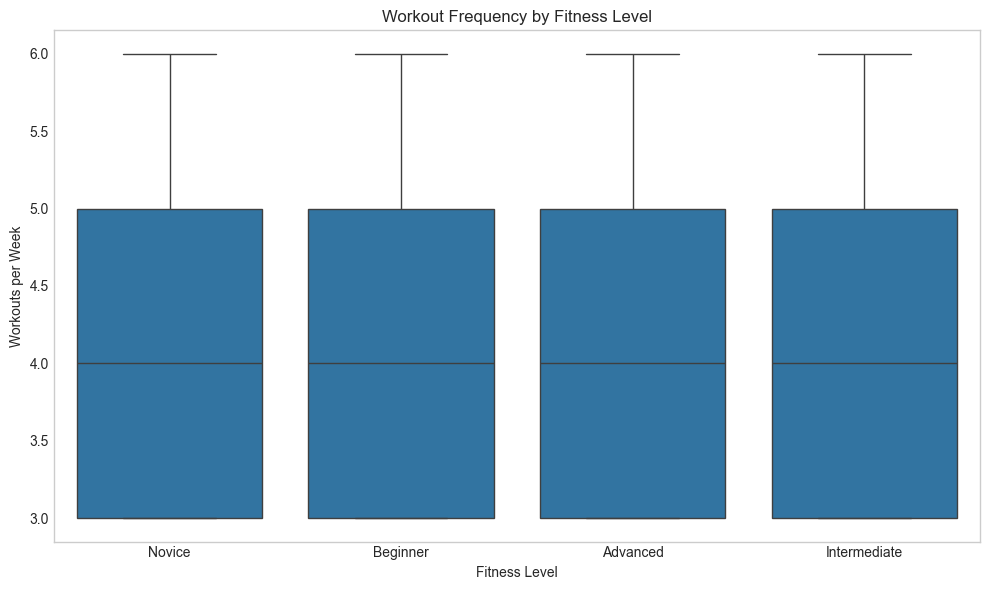

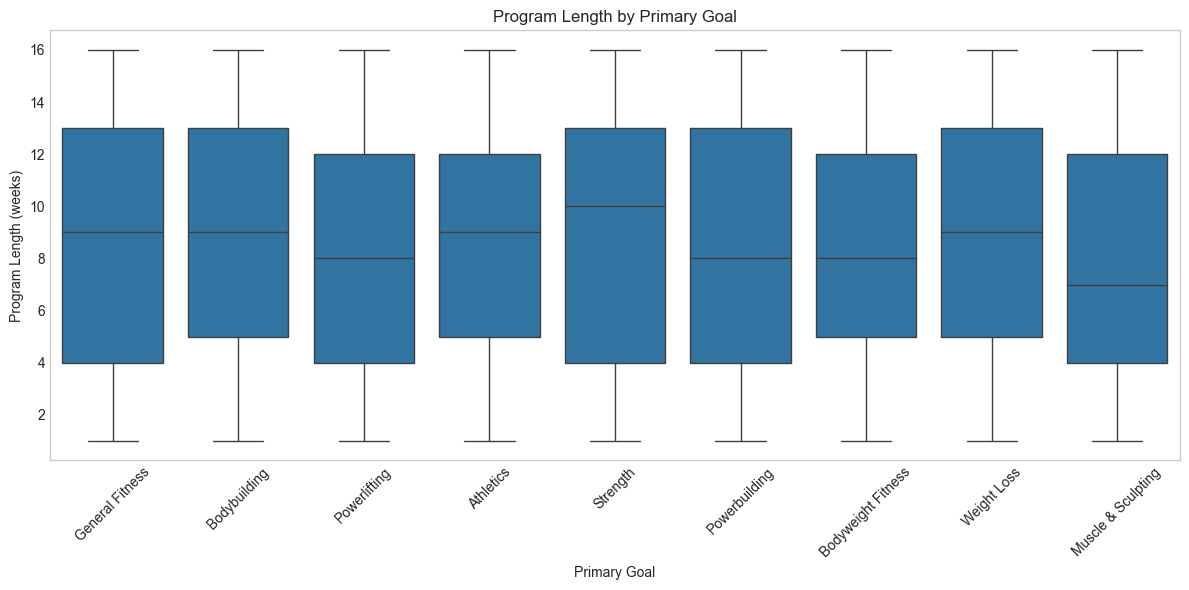

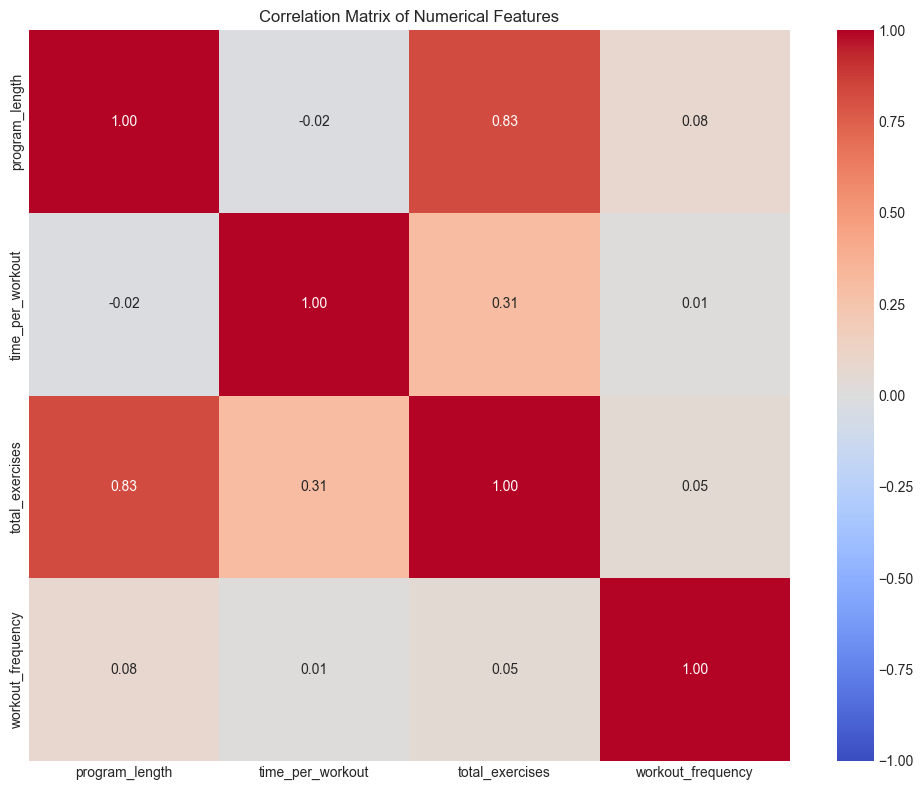

In [5]:
# workout time by fitness level
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_level', y='time_per_workout', data=programs_df)
plt.title('Workout Duration by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Time per Workout (minutes)')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# workout frequency by fitness level
plt.figure(figsize=(10, 6))
sns.boxplot(x='primary_level', y='workout_frequency', data=programs_df)
plt.title('Workout Frequency by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Workouts per Week')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# program length by goal
plt.figure(figsize=(12, 6))
sns.boxplot(x='primary_goal', y='program_length', data=programs_df)
plt.title('Program Length by Primary Goal')
plt.xlabel('Primary Goal')
plt.ylabel('Program Length (weeks)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = programs_df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

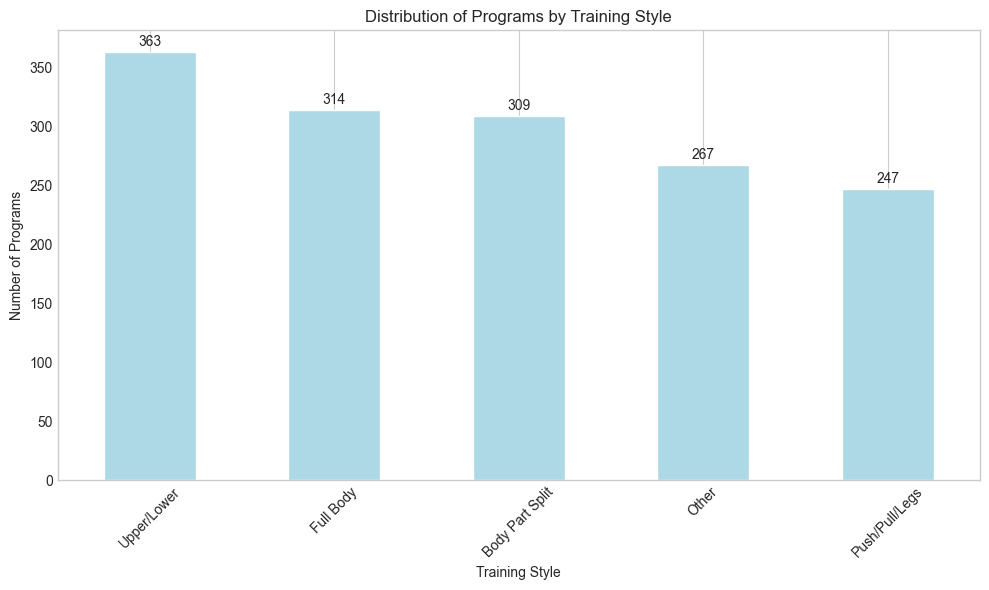

In [6]:
# trying to extract training style from description
def determine_training_style(description):
    """Extract the training style from program description"""
    description = description.lower()
    if 'full body' in description:
        return 'Full Body'
    elif 'upper/lower' in description or ('upper body' in description and 'lower body' in description):
        return 'Upper/Lower'
    elif 'push/pull/legs' in description or 'ppl' in description:
        return 'Push/Pull/Legs'
    elif 'body part split' in description or 'split' in description:
        return 'Body Part Split'
    else:
        return 'Other'

# trying to determine training style
programs_df['training_style'] = programs_df['description'].apply(determine_training_style)

# Plot distribution of training styles
plt.figure(figsize=(10, 6))
style_counts = programs_df['training_style'].value_counts()
ax = style_counts.plot(kind='bar', color='lightblue')
plt.title('Distribution of Programs by Training Style')
plt.xlabel('Training Style')
plt.ylabel('Number of Programs')
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(style_counts):
    ax.text(i, v + 5, str(v), ha='center')
plt.tight_layout()
plt.show()

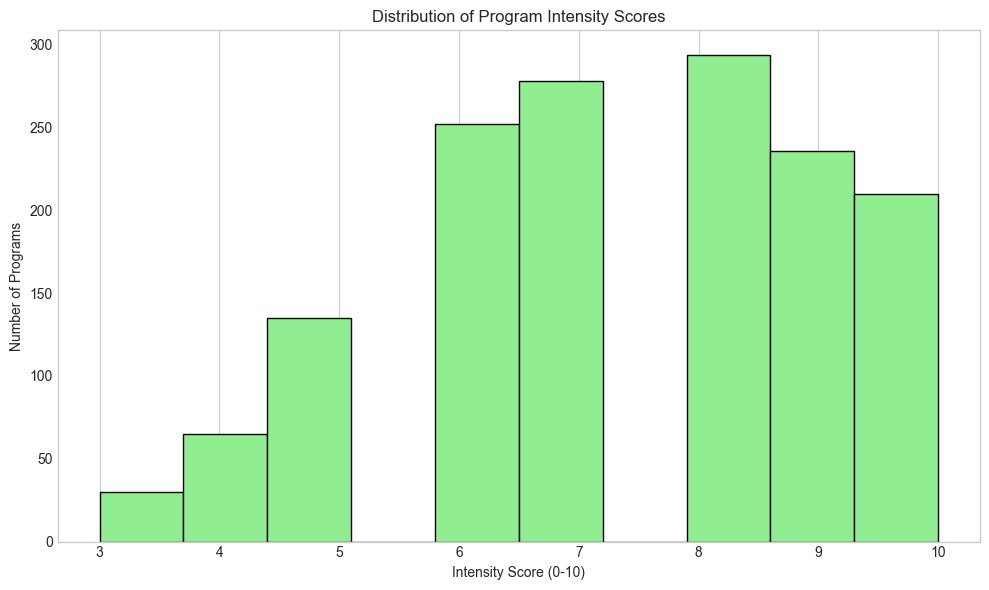

In [7]:
# Program intensity score
def calculate_intensity_score(row):
    """Calculate an intensity score based on program features"""
    # Base score from workout frequency
    intensity = row['workout_frequency'] * 1.0
    
    if row['time_per_workout'] < 45:
        intensity += 0
    elif row['time_per_workout'] < 60:
        intensity += 1
    elif row['time_per_workout'] < 90:
        intensity += 2
    else:
        intensity += 3
    
    level_map = {'Beginner': 0, 'Novice': 1, 'Intermediate': 2, 'Advanced': 3}
    primary_level = row['primary_level']
    intensity += level_map.get(primary_level, 1)
    
    return min(10, intensity) 

# intensity calculation
programs_df['intensity_score'] = programs_df.apply(calculate_intensity_score, axis=1)

# Plot distribution of intensity scores
plt.figure(figsize=(10, 6))
plt.hist(programs_df['intensity_score'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Program Intensity Scores')
plt.xlabel('Intensity Score (0-10)')
plt.ylabel('Number of Programs')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [8]:
# features for the recommendation system
program_features = programs_df[[
    'program_id',
    'primary_level',
    'primary_goal',
    'equipment',
    'program_length',
    'time_per_workout',
    'workout_frequency',
    'training_style',
    'intensity_score'
]].copy()

# Spliting features into categorical and numeric
categorical_features = ['primary_level', 'primary_goal', 'equipment', 'training_style']
numeric_features = ['program_length', 'time_per_workout', 'workout_frequency', 'intensity_score']

# Column transformer for preprocessing
program_transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=True), categorical_features),
        ('num', StandardScaler(), numeric_features)
    ], verbose_feature_names_out=False)

# Fit and transform the program features
program_features_encoded = program_transformer.fit_transform(program_features.drop('program_id', axis=1))

# feature names after encoding
encoded_feature_names = []

# categorical feature names
ohe = program_transformer.named_transformers_['cat']
for i, feature in enumerate(categorical_features):
    feature_values = ohe.categories_[i]
    encoded_feature_names.extend([f"{feature}_{val}" for val in feature_values])

# numeric feature names
encoded_feature_names.extend(numeric_features)

# Checking whether program_features_encoded is sparse or dense
if hasattr(program_features_encoded, 'toarray'):
    
    program_features_array = program_features_encoded.toarray()
else:
    program_features_array = program_features_encoded


program_features_df = pd.DataFrame(
    program_features_array,
    columns=encoded_feature_names,
    index=program_features['program_id']
)

print(f"Encoded features shape: {program_features_df.shape}")
program_features_df.head()

Encoded features shape: (1500, 26)


,primary_level_Advanced,primary_level_Beginner,primary_level_Intermediate,primary_level_Novice,primary_goal_Athletics,primary_goal_Bodybuilding,primary_goal_Bodyweight Fitness,primary_goal_General Fitness,primary_goal_Muscle & Sculpting,primary_goal_Powerbuilding,...,equipment_Garage Gym,training_style_Body Part Split,training_style_Full Body,training_style_Other,training_style_Push/Pull/Legs,training_style_Upper/Lower,program_length,time_per_workout,workout_frequency,intensity_score
program_id,,,,,,,,,,,,,,,,,,,,,
FP000001,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.184516,-1.479347,-0.160653,-1.329595
FP000002,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.982811,0.210978,-0.160653,-0.769215
FP000003,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.115880,-0.915906,-0.160653,-0.769215
FP000004,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.967784,0.023164,-0.160653,-0.208835
FP000005,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.982811,1.901302,-0.160653,1.472305


In [9]:
# user data
with open('fitness_users.json', 'r', encoding='utf-8') as f:
    synthetic_users = json.load(f)

users_df = pd.DataFrame(synthetic_users)
print(f"Loaded {len(users_df)} users")

# Displays basic user information
print(users_df.columns.tolist())
users_df[['user_id', 'age', 'gender', 'height_cm', 'weight_kg', 'fitness_level', 'experience_months', 'consistency', 'previous_training', 'goals', 'preferred_duration', 'preferred_frequency', 'preferred_style', 'preferred_exercises', 'equipment', 'available_time', 'schedule_flexibility', 'limitations', 'recovery_capacity', 'energy_levels', 'stress_levels', 'sleep_quality', 'motivation_type', 'enjoyment_factors', 'preferred_intensity', 'bmi']].head()

Loaded 1000 users
['user_id', 'age', 'gender', 'height_cm', 'weight_kg', 'fitness_level', 'experience_months', 'consistency', 'previous_training', 'goals', 'preferred_duration', 'preferred_frequency', 'preferred_style', 'preferred_exercises', 'equipment', 'available_time', 'schedule_flexibility', 'limitations', 'recovery_capacity', 'energy_levels', 'stress_levels', 'sleep_quality', 'motivation_type', 'enjoyment_factors', 'preferred_intensity', 'bmi']


,user_id,age,gender,height_cm,weight_kg,fitness_level,experience_months,consistency,previous_training,goals,...,schedule_flexibility,limitations,recovery_capacity,energy_levels,stress_levels,sleep_quality,motivation_type,enjoyment_factors,preferred_intensity,bmi
0,U000001,56,Female,164,87,Intermediate,32,2,Full Body,[General Fitness],...,4,None,1,1,5,1,Competition,[Structure],2,32.3
1,U000002,56,Male,189,73,Intermediate,20,1,Upper/Lower,[Weight Loss],...,2,Knee issues,5,5,1,4,Competition,"[Challenge, Variety]",3,20.4
2,U000003,62,Male,179,104,Beginner,6,2,None/Minimal,[Strength],...,5,Back issues,4,3,2,5,Process-driven,[Structure],1,32.5
3,U000004,30,Male,196,98,Novice,6,4,Full Body,[Athletic Performance],...,4,None,4,4,2,3,Process-driven,[Social],4,25.5
4,U000005,58,Male,170,67,Novice,7,3,Full Body,[Strength],...,1,None,3,3,3,4,Results-driven,[Variety],2,23.2


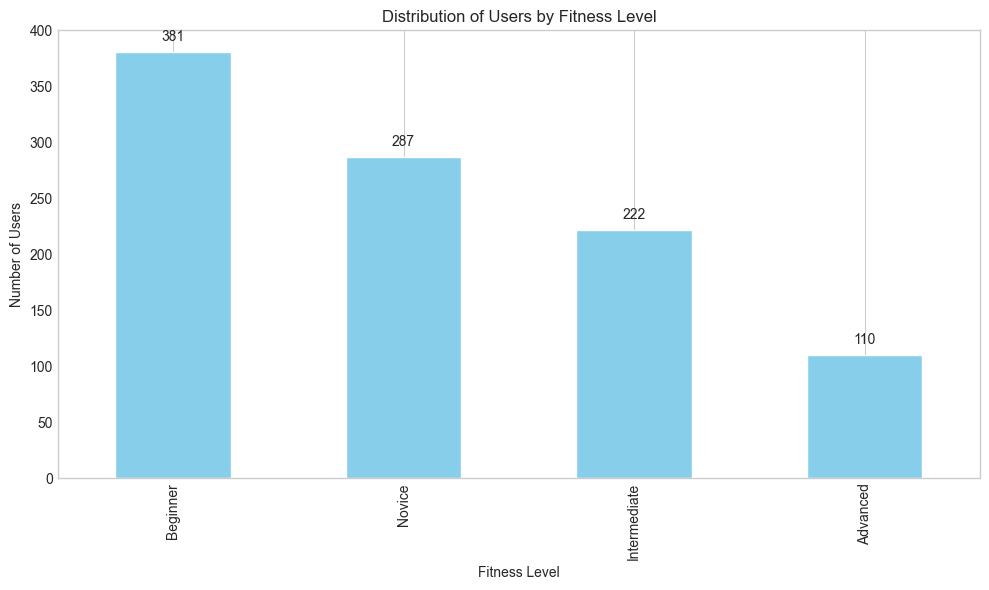

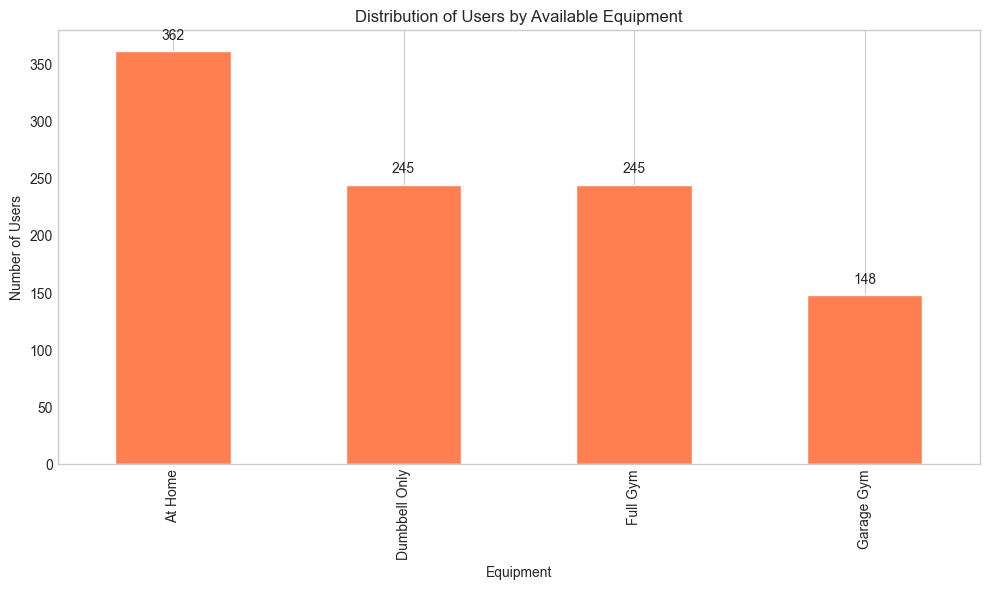

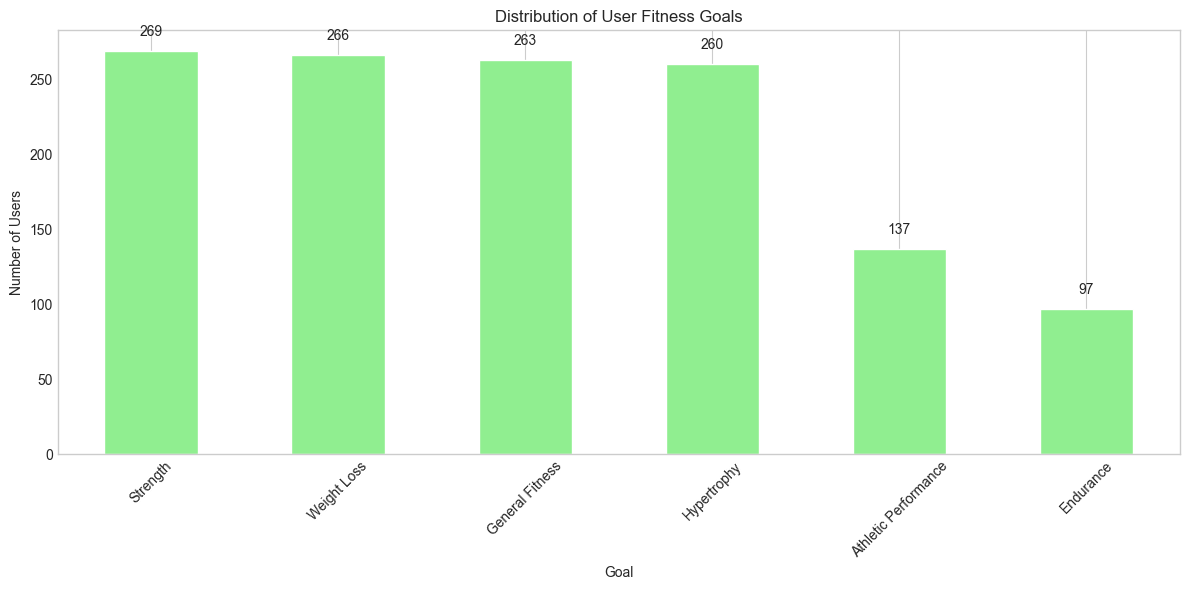

In [10]:
# user fitness level distribution
plt.figure(figsize=(10, 6))
user_level_counts = users_df['fitness_level'].value_counts()
ax = user_level_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Users by Fitness Level')
plt.xlabel('Fitness Level')
plt.ylabel('Number of Users')
plt.grid(axis='y')
for i, v in enumerate(user_level_counts):
    ax.text(i, v + 10, str(v), ha='center')
plt.tight_layout()
plt.show()

# user equipment distribution
plt.figure(figsize=(10, 6))
user_equipment_counts = users_df['equipment'].value_counts()
ax = user_equipment_counts.plot(kind='bar', color='coral')
plt.title('Distribution of Users by Available Equipment')
plt.xlabel('Equipment')
plt.ylabel('Number of Users')
plt.grid(axis='y')
for i, v in enumerate(user_equipment_counts):
    ax.text(i, v + 10, str(v), ha='center')
plt.tight_layout()
plt.show()


all_goals = []
for goals_list in users_df['goals']:
    all_goals.extend(goals_list)

goal_series = pd.Series(all_goals)
user_goal_counts = goal_series.value_counts()

plt.figure(figsize=(12, 6))
ax = user_goal_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of User Fitness Goals')
plt.xlabel('Goal')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.grid(axis='y')
for i, v in enumerate(user_goal_counts):
    ax.text(i, v + 10, str(v), ha='center')
plt.tight_layout()
plt.show()

In [11]:
def process_user_features(user_df, program_transformer):
    """
    Process user features to match the program feature space
    
    Parameters:
    -----------
    user_df : pandas.DataFrame
        DataFrame containing user profiles
    program_transformer : ColumnTransformer
        The transformer used for program features
        
    Returns:
    --------
    pandas.DataFrame
        Processed user features that match the program feature space
    """
    
    user_match_features = user_df[['user_id', 'fitness_level', 'goals', 'equipment', 
                                 'preferred_duration', 'preferred_frequency', 'preferred_style']].copy()
    
    # primary goal for each user
    user_match_features['primary_goal'] = user_match_features['goals'].apply(
        lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'General Fitness'
    )
    
    # Map user features to program features
    user_match_features['primary_level'] = user_match_features['fitness_level']
    
    # Map preferred duration to time_per_workout
    duration_map = {
        '30-45 min': 40,
        '45-60 min': 55,
        '60-75 min': 70,
        '75-90 min': 85,
        '90+ min': 100
    }
    user_match_features['time_per_workout'] = user_match_features['preferred_duration'].map(duration_map)
    
    user_match_features['time_per_workout'] = user_match_features['time_per_workout'].fillna(60)
    
    user_match_features['workout_frequency'] = user_match_features['preferred_frequency']
    
    style_map = {
        'Full Body': 'Full Body',
        'Upper/Lower': 'Upper/Lower',
        'Push/Pull/Legs': 'Push/Pull/Legs',
        'Body Part Split': 'Body Part Split',
        'No preference': 'Other'
    }
    user_match_features['training_style'] = user_match_features['preferred_style'].map(style_map)
    
   
    user_match_features['training_style'] = user_match_features['training_style'].fillna('Other')
    
    # This is a proxy value
    level_to_length = {
        'Beginner': 4,
        'Novice': 8,
        'Intermediate': 12,
        'Advanced': 16
    }
    user_match_features['program_length'] = user_match_features['primary_level'].map(level_to_length)
    user_match_features['program_length'] = user_match_features['program_length'].fillna(8)
    
    def calculate_user_intensity(row):
        intensity = row['workout_frequency'] * 1.0    
        
        duration = row['time_per_workout']
        if duration < 45:
            intensity += 0
        elif duration < 60:
            intensity += 1
        elif duration < 90:
            intensity += 2
        else:
            intensity += 3
        
        level_map = {'Beginner': 0, 'Novice': 1, 'Intermediate': 2, 'Advanced': 3}
        intensity += level_map.get(row['primary_level'], 1)
        
        return min(10, intensity)
    
    user_match_features['intensity_score'] = user_match_features.apply(calculate_user_intensity, axis=1)
    
    # same features as programs for consistency
    user_features = user_match_features[['user_id', 'primary_level', 'primary_goal', 'equipment', 
                                       'program_length', 'time_per_workout', 'workout_frequency', 
                                       'training_style', 'intensity_score']]
    
    # same transformer to process user features
    features_to_transform = user_features.drop('user_id', axis=1)
    
    expected_cols = ['primary_level', 'primary_goal', 'equipment', 'training_style', 
                    'program_length', 'time_per_workout', 'workout_frequency', 'intensity_score']
    features_to_transform = features_to_transform[expected_cols]
    
    # Transform
    user_features_encoded = program_transformer.transform(features_to_transform)
    
    feature_names = encoded_feature_names
    
    # Check if user_features_encoded is sparse or dense
    if hasattr(user_features_encoded, 'toarray'):
        user_features_array = user_features_encoded.toarray()
    else:
        user_features_array = user_features_encoded
    
    # Converted to DataFrame with user_id as index
    user_features_df = pd.DataFrame(
        user_features_array,
        columns=feature_names,
        index=user_features['user_id']
    )
    
    return user_features_df

In [12]:
user_features_df = process_user_features(users_df, program_transformer)
print(f"Processed user features shape: {user_features_df.shape}")
user_features_df.head()

Processed user features shape: (1000, 26)


,primary_level_Advanced,primary_level_Beginner,primary_level_Intermediate,primary_level_Novice,primary_goal_Athletics,primary_goal_Bodybuilding,primary_goal_Bodyweight Fitness,primary_goal_General Fitness,primary_goal_Muscle & Sculpting,primary_goal_Powerbuilding,...,equipment_Garage Gym,training_style_Body Part Split,training_style_Full Body,training_style_Other,training_style_Push/Pull/Legs,training_style_Upper/Lower,program_length,time_per_workout,workout_frequency,intensity_score
user_id,,,,,,,,,,,,,,,,,,,,,
U000001,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.751051,0.023164,-0.160653,0.351545
U000002,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.751051,0.023164,0.762641,0.911925
U000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,-0.982811,-1.103719,-1.083948,-2.450355
U000004,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.115880,-1.103719,-2.007243,-2.450355
U000005,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,-0.115880,-1.103719,-1.083948,-1.889975


In [13]:
def content_based_recommendations(user_features, program_features, user_id, top_n=5):
    """
    Program recommendations based on user-program feature similarity
    
    Parameters:
    -----------
    user_features : pandas.DataFrame
        DataFrame with processed user features
    program_features : pandas.DataFrame
        DataFrame with processed program features
    user_id : str
        ID of the user to generate recommendations for
    top_n : int
        Number of recommendations to generate
        
    Returns:
    --------
    list
        List of tuples (program_id, similarity_score)
    """
    if user_id not in user_features.index:
        print(f"User {user_id} not found")
        return []
    
    # user's feature vector
    user_vector = user_features.loc[user_id].values.reshape(1, -1)
    
    # Calculating cosine similarity to all programs
    similarities = cosine_similarity(user_vector, program_features)
    
    # indices of the top N most similar programs
    similar_indices = similarities[0].argsort()[-top_n:][::-1]
    
    # program IDs and similarity scores
    similar_programs = []
    for idx in similar_indices:
        program_id = program_features.index[idx]
        similarity_score = similarities[0][idx]
        similar_programs.append((program_id, similarity_score))
    
    return similar_programs

# Testing the content-based recommendations with a sample user
sample_user_id = users_df.iloc[0]['user_id']
print(f"Content-based recommendations for user {sample_user_id}")

# user details for context
sample_user = users_df[users_df['user_id'] == sample_user_id].iloc[0]
print(f"User details:")
print(f"- Fitness level: {sample_user['fitness_level']}")
print(f"- Goals: {sample_user['goals']}")
print(f"- Equipment: {sample_user['equipment']}")
print(f"- Preferred workout duration: {sample_user['preferred_duration']}")
print(f"- Preferred workout frequency: {sample_user['preferred_frequency']} days/week")

# Get content-based recommendations
content_recs = content_based_recommendations(user_features_df, program_features_df, sample_user_id, top_n=5)

print("\nTop content-based recommendations:")
for i, (program_id, similarity) in enumerate(content_recs, 1):
    program = programs_df[programs_df['program_id'] == program_id].iloc[0]
    print(f"{i}. {program['title']} (Similarity: {similarity:.4f})")
    print(f"   - Level: {program['primary_level']}")
    print(f"   - Goal: {program['primary_goal']}")
    print(f"   - Equipment: {program['equipment']}")
    print(f"   - Workout duration: {program['time_per_workout']} minutes")
    print(f"   - Frequency: {program['workout_frequency']} days/week")

Content-based recommendations for user U000001
User details:
- Fitness level: Intermediate
- Goals: ['General Fitness']
- Equipment: At Home
- Preferred workout duration: 60-75 min
- Preferred workout frequency: 4 days/week

Top content-based recommendations:
1. Power Athletic Program (Similarity: 0.7570)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Workout duration: 70 minutes
   - Frequency: 4 days/week
2. Hypertrophy Strength Method (Similarity: 0.7516)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Workout duration: 45 minutes
   - Frequency: 3 days/week
3. 5-Day Full Body with Specialization Split (Similarity: 0.7191)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Workout duration: 50 minutes
   - Frequency: 4 days/week
4. 5-Day PHAT (Power Hypertrophy Adaptive Training) Split (Similarity: 0.7138)
   - Level: Intermediate
   - Goal: Athletics
   - Equipment: At Home
   - Workout

In [14]:
# Implemented the collaborative filtering component that finds similar users and their preferred programs

def find_similar_users(user_features, target_user_id, n_neighbors=5):
    """
    Find users similar to the target user
    
    Parameters:
    -----------
    user_features : pandas.DataFrame
        DataFrame with processed user features
    target_user_id : str
        ID of the target user
    n_neighbors : int
        Number of similar users to find
        
    Returns:
    --------
    list
        List of tuples (user_id, distance)
    """
    if target_user_id not in user_features.index:
        print(f"User {target_user_id} not found")
        return []
    
    # nearest neighbors model
    knn = NearestNeighbors(n_neighbors=n_neighbors+1, algorithm='auto')
    knn.fit(user_features.values)
    
    # user's feature vector
    user_vector = user_features.loc[target_user_id].values.reshape(1, -1)
    
    # nearest neighbors
    distances, indices = knn.kneighbors(user_vector)
    
    # similar users
    similar_user_indices = indices[0][1:]
    similar_distances = distances[0][1:]
    
    # user IDs and distances
    similar_users = []
    for idx, dist in zip(similar_user_indices, similar_distances):
        user_id = user_features.index[idx]
        similar_users.append((user_id, dist))
    
    return similar_users

def collaborative_recommendations(user_features, program_features, programs_df, target_user_id, top_n=5):
    """
    recommendations based on similar users' preferences
    
    Parameters:
    -----------
    user_features : pandas.DataFrame
        DataFrame with processed user features
    program_features : pandas.DataFrame
        DataFrame with processed program features
    programs_df : pandas.DataFrame
        DataFrame with program details
    target_user_id : str
        ID of the user to generate recommendations for
    top_n : int
        Number of recommendations to generate
        
    Returns:
    --------
    list
        List of tuples (program_id, score)
    """
    # similar users
    similar_users = find_similar_users(user_features, target_user_id, n_neighbors=5)
    
    if not similar_users:
        return []
    
    # recommendations for each similar user
    all_recommendations = []
    
    for user_id, user_distance in similar_users:
        
        user_recs = content_based_recommendations(user_features, program_features, user_id, top_n=3)
        
        # Weight recommendations by user similarity 
        similarity_weight = 1.0 / (1.0 + user_distance)
        
        for program_id, program_similarity in user_recs:
            # Weight the recommendation by both user similarity and program similarity
            score = similarity_weight * program_similarity
            all_recommendations.append((program_id, score))
    
    program_scores = {}
    for program_id, score in all_recommendations:
        if program_id not in program_scores:
            program_scores[program_id] = 0
        program_scores[program_id] += score
    
    sorted_recommendations = sorted(program_scores.items(), key=lambda x: x[1], reverse=True)
    
    top_recommendations = sorted_recommendations[:top_n]
    
    return top_recommendations

similar_users = find_similar_users(user_features_df, sample_user_id, n_neighbors=5)

print(f"Users similar to {sample_user_id}:")
for i, (user_id, distance) in enumerate(similar_users, 1):
    user = users_df[users_df['user_id'] == user_id].iloc[0]
    print(f"{i}. User {user_id} (Distance: {distance:.4f})")
    print(f"   - Fitness level: {user['fitness_level']}")
    print(f"   - Goals: {user['goals']}")
    print(f"   - Equipment: {user['equipment']}")

collab_recs = collaborative_recommendations(
    user_features_df, program_features_df, programs_df, sample_user_id, top_n=5
)

print("\nTop collaborative recommendations:")
for i, (program_id, score) in enumerate(collab_recs, 1):
    program = programs_df[programs_df['program_id'] == program_id].iloc[0]
    print(f"{i}. {program['title']} (Score: {score:.4f})")
    print(f"   - Level: {program['primary_level']}")
    print(f"   - Goal: {program['primary_goal']}")
    print(f"   - Equipment: {program['equipment']}")
    print(f"   - Workout duration: {program['time_per_workout']} minutes")
    print(f"   - Frequency: {program['workout_frequency']} days/week")

Users similar to U000001:
1. User U000997 (Distance: 0.5634)
   - Fitness level: Intermediate
   - Goals: ['General Fitness']
   - Equipment: At Home
2. User U000271 (Distance: 1.4142)
   - Fitness level: Intermediate
   - Goals: ['Weight Loss']
   - Equipment: At Home
3. User U000076 (Distance: 1.4142)
   - Fitness level: Intermediate
   - Goals: ['General Fitness', 'Weight Loss']
   - Equipment: At Home
4. User U000582 (Distance: 1.5223)
   - Fitness level: Intermediate
   - Goals: ['General Fitness']
   - Equipment: At Home
5. User U000204 (Distance: 1.5223)
   - Fitness level: Intermediate
   - Goals: ['General Fitness']
   - Equipment: At Home

Top collaborative recommendations:
1. BeastHypertrophy System (Score: 1.4269)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Workout duration: 100 minutes
   - Frequency: 4 days/week
2. Power Athletic Program (Score: 1.3645)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Wo

In [15]:
# Now combining the content-based and collaborative filtering approaches into a hybrid system:

def hybrid_recommendations(user_id, user_features_df, program_features_df, programs_df, 
                          top_n=5, content_weight=0.7, collab_weight=0.3):
    """
    Generate hybrid recommendations using content-based and collaborative filtering
    
    Parameters:
    -----------
    user_id : str
        ID of the user to generate recommendations for
    user_features_df : pandas.DataFrame
        DataFrame with processed user features
    program_features_df : pandas.DataFrame
        DataFrame with processed program features
    programs_df : pandas.DataFrame
        DataFrame with program details
    top_n : int
        Number of recommendations to generate
    content_weight : float
        Weight for content-based recommendations (0-1)
    collab_weight : float
        Weight for collaborative recommendations (0-1)
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with recommended programs and details
    """
    # Get content-based recommendations
    content_recs = content_based_recommendations(
        user_features_df, program_features_df, user_id, top_n=top_n*2
    )
    
    # Get collaborative recommendations
    collab_recs = collaborative_recommendations(
        user_features_df, program_features_df, programs_df, user_id, top_n=top_n*2
    )
    
    # Weight the recommendations
    rec_scores = {}
    
    for program_id, similarity in content_recs:
        if program_id not in rec_scores:
            rec_scores[program_id] = 0
        rec_scores[program_id] += content_weight * similarity
    
    for program_id, score in collab_recs:
        if program_id not in rec_scores:
            rec_scores[program_id] = 0
        rec_scores[program_id] += collab_weight * score
    
    # Sort by score
    sorted_recs = sorted(rec_scores.items(), key=lambda x: x[1], reverse=True)
    
    # top N programs
    top_programs = [program_id for program_id, _ in sorted_recs[:top_n]]
    
    #program details
    recommended_programs = programs_df[programs_df['program_id'].isin(top_programs)].copy()
    
    # score to the results
    recommended_programs['match_score'] = recommended_programs['program_id'].map({prog: score for prog, score in sorted_recs})
    
    # match percentage (scaled to 100%)
    max_score = recommended_programs['match_score'].max()
    recommended_programs['match_percentage'] = (recommended_programs['match_score'] / max_score * 100).round().astype(int)
    
    # Sort by score
    recommended_programs = recommended_programs.sort_values('match_score', ascending=False)
    
    return recommended_programs[['program_id', 'title', 'primary_level', 'primary_goal', 'equipment', 
                               'program_length', 'time_per_workout', 'workout_frequency', 'match_percentage']]

# Get hybrid recommendations for sample user
hybrid_recs = hybrid_recommendations(
    sample_user_id, user_features_df, program_features_df, programs_df, 
    top_n=5, content_weight=0.7, collab_weight=0.3
)

print("Top hybrid recommendations:")
for i, row in enumerate(hybrid_recs.itertuples(), 1):
    print(f"{i}. {row.title} (Match: {row.match_percentage}%)")
    print(f"   - Level: {row.primary_level}")
    print(f"   - Goal: {row.primary_goal}")
    print(f"   - Equipment: {row.equipment}")
    print(f"   - Program Length: {row.program_length} weeks")
    print(f"   - Workout Duration: {row.time_per_workout} min/workout")
    print(f"   - Frequency: {row.workout_frequency} workouts/week")

Top hybrid recommendations:
1. Power Athletic Program (Match: 100%)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Program Length: 10 weeks
   - Workout Duration: 70 min/workout
   - Frequency: 4 workouts/week
2. BeastHypertrophy System (Match: 98%)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Program Length: 13 weeks
   - Workout Duration: 100 min/workout
   - Frequency: 4 workouts/week
3. Performance General Fitness Builder (Match: 75%)
   - Level: Intermediate
   - Goal: Weight Loss
   - Equipment: At Home
   - Program Length: 11 weeks
   - Workout Duration: 100 min/workout
   - Frequency: 3 workouts/week
4. 5-Day Full Body with Specialization Split (Match: 63%)
   - Level: Intermediate
   - Goal: General Fitness
   - Equipment: At Home
   - Program Length: 14 weeks
   - Workout Duration: 50 min/workout
   - Frequency: 4 workouts/week
5. Hypertrophy Strength Method (Match: 56%)
   - Level: Intermediate
   - Goal: 

Evaluating recommendations for 100 users...
Evaluation results:
Level match rate: 99.00%
Goal match rate: 47.00%
Equipment match rate: 98.00%
Workout time match rate: 56.00%
Workout frequency match rate: 99.00%
Overall match rate: 79.80%


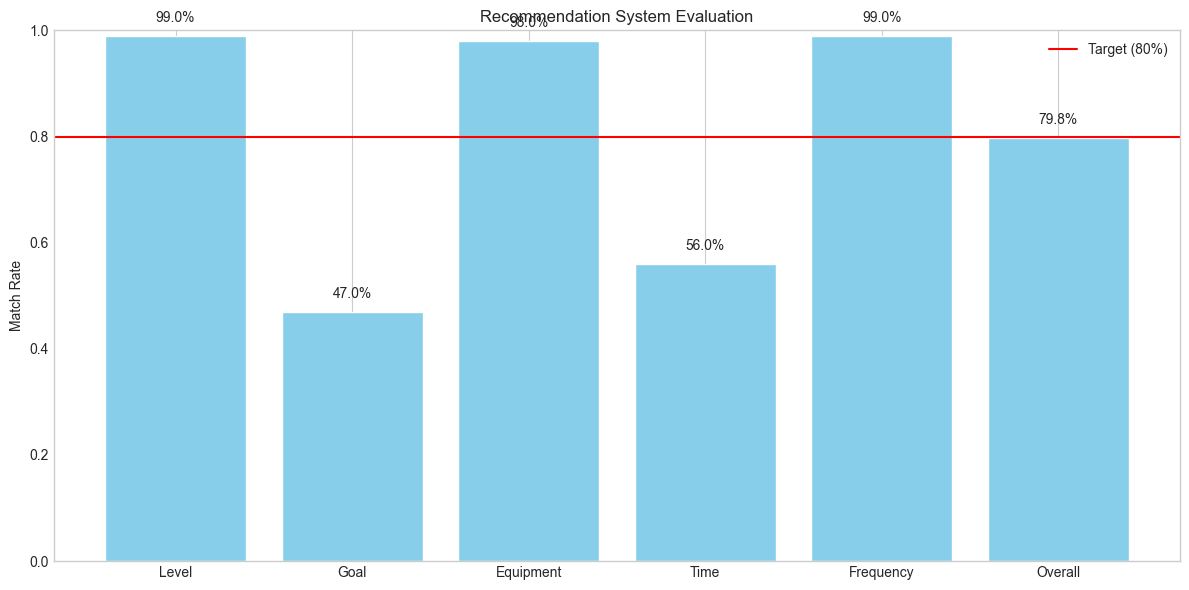

In [16]:
# Now evaluating how well recommendation system performs:

def evaluate_recommendations(users_df, programs_df, user_features_df, program_features_df, 
                            num_samples=100, content_weight=0.7, collab_weight=0.3):
    """
    Evaluate the recommendation system using a sample of users
    
    Parameters:
    -----------
    users_df : pandas.DataFrame
        DataFrame with user profiles
    programs_df : pandas.DataFrame
        DataFrame with program details
    user_features_df : pandas.DataFrame
        DataFrame with processed user features
    program_features_df : pandas.DataFrame
        DataFrame with processed program features
    num_samples : int
        Number of users to sample for evaluation
    content_weight : float
        Weight for content-based recommendations
    collab_weight : float
        Weight for collaborative recommendations
        
    Returns:
    --------
    dict
        Dictionary with evaluation metrics
    """
    sample_users = users_df.sample(min(num_samples, len(users_df)))
    
    level_match_count = 0
    goal_match_count = 0
    equipment_match_count = 0
    time_match_count = 0
    frequency_match_count = 0
    
    print(f"Evaluating recommendations for {len(sample_users)} users...")
    
    for _, user in sample_users.iterrows():
        user_id = user['user_id']
        
        recs = hybrid_recommendations(
            user_id, user_features_df, program_features_df, programs_df, 
            top_n=3, content_weight=content_weight, collab_weight=collab_weight
        )
        
        if len(recs) == 0:
            continue
        
        top_rec = recs.iloc[0]
        program_id = top_rec['program_id']
        
        program = programs_df[programs_df['program_id'] == program_id].iloc[0]
        
        user_level = user['fitness_level']
        program_levels = program['level']
        if isinstance(program_levels, str):
            try:
                program_levels = eval(program_levels)
            except:
                program_levels = [program_levels]
                
        if user_level in program_levels:
            level_match_count += 1
        
        user_goals = user['goals']
        program_goals = program['goal']
        if isinstance(program_goals, str):
            try:
                program_goals = eval(program_goals)
            except:
                program_goals = [program_goals]
                
        if any(goal in program_goals for goal in user_goals):
            goal_match_count += 1
        
        if user['equipment'] == program['equipment']:
            equipment_match_count += 1
        
        duration_map = {
            '30-45 min': 40,
            '45-60 min': 55,
            '60-75 min': 70,
            '75-90 min': 85,
            '90+ min': 100
        }
        user_duration = duration_map.get(user['preferred_duration'], 60)
        
        if abs(user_duration - program['time_per_workout']) <= 0.2 * user_duration:
            time_match_count += 1
        
        if abs(user['preferred_frequency'] - program['workout_frequency']) <= 1:
            frequency_match_count += 1
    
    num_evaluated = len(sample_users)
    level_match_rate = level_match_count / num_evaluated
    goal_match_rate = goal_match_count / num_evaluated
    equipment_match_rate = equipment_match_count / num_evaluated
    time_match_rate = time_match_count / num_evaluated
    frequency_match_rate = frequency_match_count / num_evaluated
    
    overall_match_rate = (level_match_rate + goal_match_rate + equipment_match_rate + 
                         time_match_rate + frequency_match_rate) / 5
    
    print("Evaluation results:")
    print(f"Level match rate: {level_match_rate:.2%}")
    print(f"Goal match rate: {goal_match_rate:.2%}")
    print(f"Equipment match rate: {equipment_match_rate:.2%}")
    print(f"Workout time match rate: {time_match_rate:.2%}")
    print(f"Workout frequency match rate: {frequency_match_rate:.2%}")
    print(f"Overall match rate: {overall_match_rate:.2%}")
    
    return {
        'level_match': level_match_rate,
        'goal_match': goal_match_rate,
        'equipment_match': equipment_match_rate,
        'time_match': time_match_rate,
        'frequency_match': frequency_match_rate,
        'overall_match': overall_match_rate
    }

evaluation_results = evaluate_recommendations(
    users_df, programs_df, user_features_df, program_features_df, 
    num_samples=100, content_weight=0.7, collab_weight=0.3
)

plt.figure(figsize=(12, 6))
categories = ['Level', 'Goal', 'Equipment', 'Time', 'Frequency', 'Overall']
values = [
    evaluation_results['level_match'], 
    evaluation_results['goal_match'], 
    evaluation_results['equipment_match'], 
    evaluation_results['time_match'],
    evaluation_results['frequency_match'], 
    evaluation_results['overall_match']
]

bars = plt.bar(categories, values, color='skyblue')
plt.axhline(y=0.8, color='r', linestyle='-', label='Target (80%)')
plt.ylim(0, 1.0)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.02,
            f'{height:.1%}', ha='center', va='bottom')

plt.ylabel('Match Rate')
plt.title('Recommendation System Evaluation')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Testing weights: Content=0.5, Collaborative=0.5
Evaluating recommendations for 50 users...
Evaluation results:
Level match rate: 100.00%
Goal match rate: 50.00%
Equipment match rate: 98.00%
Workout time match rate: 52.00%
Workout frequency match rate: 98.00%
Overall match rate: 79.60%
Testing weights: Content=0.6, Collaborative=0.4
Evaluating recommendations for 50 users...
Evaluation results:
Level match rate: 98.00%
Goal match rate: 44.00%
Equipment match rate: 98.00%
Workout time match rate: 64.00%
Workout frequency match rate: 98.00%
Overall match rate: 80.40%
Testing weights: Content=0.7, Collaborative=0.3
Evaluating recommendations for 50 users...
Evaluation results:
Level match rate: 98.00%
Goal match rate: 36.00%
Equipment match rate: 98.00%
Workout time match rate: 58.00%
Workout frequency match rate: 98.00%
Overall match rate: 77.60%
Testing weights: Content=0.8, Collaborative=0.2
Evaluating recommendations for 50 users...
Evaluation results:
Level match rate: 98.00%
Goal mat

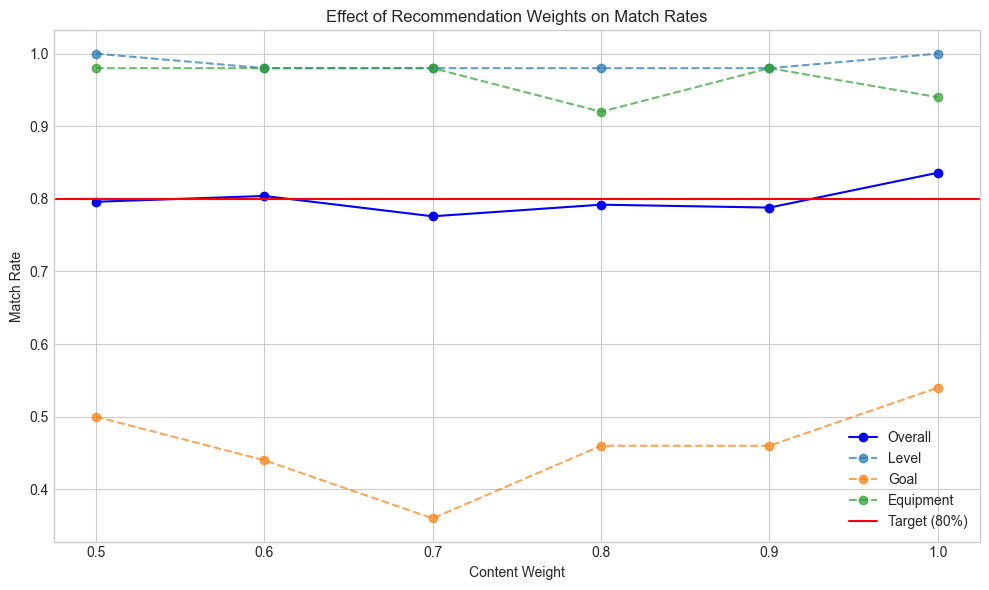

In [17]:
# Finding the optimal weights for the hybrid recommendation system:

def optimize_recommendation_weights(users_df, programs_df, user_features_df, program_features_df, num_samples=50):
    """
    Find the optimal weights for hybrid recommendations
    
    Parameters:
    -----------
    users_df : pandas.DataFrame
        DataFrame with user profiles
    programs_df : pandas.DataFrame
        DataFrame with program details
    user_features_df : pandas.DataFrame
        DataFrame with processed user features
    program_features_df : pandas.DataFrame
        DataFrame with processed program features
    num_samples : int
        Number of users to sample for optimization
        
    Returns:
    --------
    tuple
        Optimal weights (content_weight, collab_weight)
    """
    weight_combinations = [
        (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (1.0, 0.0)
    ]
    
    results = []
    
    for content_weight, collab_weight in weight_combinations:
        print(f"Testing weights: Content={content_weight}, Collaborative={collab_weight}")
        
        evaluation = evaluate_recommendations(
            users_df, programs_df, user_features_df, program_features_df, 
            num_samples=num_samples, content_weight=content_weight, collab_weight=collab_weight
        )
        
        results.append({
            'content_weight': content_weight,
            'collab_weight': collab_weight,
            'overall_match': evaluation['overall_match'],
            'level_match': evaluation['level_match'],
            'goal_match': evaluation['goal_match'],
            'equipment_match': evaluation['equipment_match'],
            'time_match': evaluation['time_match'],
            'frequency_match': evaluation['frequency_match']
        })
    
    results_df = pd.DataFrame(results)
    
    best_result = results_df.loc[results_df['overall_match'].idxmax()]
    
    print("\nOptimization results:")
    print(results_df[['content_weight', 'collab_weight', 'overall_match']])
    
    print("\nBest weights:")
    print(f"Content weight: {best_result['content_weight']}")
    print(f"Collaborative weight: {best_result['collab_weight']}")
    print(f"Overall match rate: {best_result['overall_match']:.2%}")
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(results_df['content_weight'], results_df['overall_match'], 'o-', color='blue', label='Overall')
    plt.plot(results_df['content_weight'], results_df['level_match'], 'o--', alpha=0.7, label='Level')
    plt.plot(results_df['content_weight'], results_df['goal_match'], 'o--', alpha=0.7, label='Goal')
    plt.plot(results_df['content_weight'], results_df['equipment_match'], 'o--', alpha=0.7, label='Equipment')
    
    plt.axhline(y=0.8, color='r', linestyle='-', label='Target (80%)')
    plt.xlabel('Content Weight')
    plt.ylabel('Match Rate')
    plt.title('Effect of Recommendation Weights on Match Rates')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    return best_result['content_weight'], best_result['collab_weight']

# optimal weights
optimal_content_weight, optimal_collab_weight = optimize_recommendation_weights(
    users_df, programs_df, user_features_df, program_features_df, num_samples=50
)

In [18]:
# Final function that can generate recommendations for any user:

def process_user_features(user_df, program_transformer, encoded_feature_names=encoded_feature_names):
    """
    Process user features to match the program feature space
    
    Parameters:
    -----------
    user_df : pandas.DataFrame
        DataFrame containing user profiles
    program_transformer : ColumnTransformer
        The transformer used for program features
    encoded_feature_names : list
        List of feature names after encoding
        
    Returns:
    --------
    pandas.DataFrame
        Processed user features that match the program feature space
    """
    # Created a new DataFrame with only the features we need for matching
    user_match_features = user_df[['user_id', 'fitness_level', 'goals', 'equipment', 
                                 'preferred_duration', 'preferred_frequency', 'preferred_style']].copy()
    
    user_match_features['primary_goal'] = user_match_features['goals'].apply(
        lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'General Fitness'
    )
    
    user_match_features['primary_level'] = user_match_features['fitness_level']
    
    duration_map = {
        '30-45 min': 40,
        '45-60 min': 55,
        '60-75 min': 70,
        '75-90 min': 85,
        '90+ min': 100
    }
    user_match_features['time_per_workout'] = user_match_features['preferred_duration'].map(duration_map)
    
    user_match_features['time_per_workout'] = user_match_features['time_per_workout'].fillna(60)
    
    user_match_features['workout_frequency'] = pd.to_numeric(user_match_features['preferred_frequency'], errors='coerce').fillna(4)
    
    # Map training style
    style_map = {
        'Full Body': 'Full Body',
        'Upper/Lower': 'Upper/Lower',
        'Push/Pull/Legs': 'Push/Pull/Legs',
        'Body Part Split': 'Body Part Split',
        'No preference': 'Other'
    }
    user_match_features['training_style'] = user_match_features['preferred_style'].map(style_map)
    
    user_match_features['training_style'] = user_match_features['training_style'].fillna('Other')
    
    level_to_length = {
        'Beginner': 4,
        'Novice': 8,
        'Intermediate': 12,
        'Advanced': 16
    }
    user_match_features['program_length'] = user_match_features['primary_level'].map(level_to_length)
    user_match_features['program_length'] = user_match_features['program_length'].fillna(8)
    
    def calculate_user_intensity(row):
        intensity = row['workout_frequency'] * 1.0
        
        duration = row['time_per_workout']
        if duration < 45:
            intensity += 0
        elif duration < 60:
            intensity += 1
        elif duration < 90:
            intensity += 2
        else:
            intensity += 3
        
        level_map = {'Beginner': 0, 'Novice': 1, 'Intermediate': 2, 'Advanced': 3}
        intensity += level_map.get(row['primary_level'], 1)
        
        return min(10, intensity)
    
    user_match_features['intensity_score'] = user_match_features.apply(calculate_user_intensity, axis=1)
    
    # Selected the same features as programs for consistency
    user_features = user_match_features[['user_id', 'primary_level', 'primary_goal', 'equipment', 
                                       'program_length', 'time_per_workout', 'workout_frequency', 
                                       'training_style', 'intensity_score']]
    
    features_to_transform = user_features.drop('user_id', axis=1)
    
    expected_cols = ['primary_level', 'primary_goal', 'equipment', 'training_style', 
                    'program_length', 'time_per_workout', 'workout_frequency', 'intensity_score']
    
    for col in expected_cols:
        if col not in features_to_transform.columns:
            if col in ['primary_level', 'primary_goal', 'equipment', 'training_style']:
                features_to_transform[col] = 'Other'
            else:
                features_to_transform[col] = 0 
                
    features_to_transform = features_to_transform[expected_cols]
    
    # Transform
    user_features_encoded = program_transformer.transform(features_to_transform)
    
    if hasattr(user_features_encoded, 'toarray'):
        user_features_array = user_features_encoded.toarray()
    else:
        user_features_array = user_features_encoded
    
    user_features_df = pd.DataFrame(
        user_features_array,
        columns=encoded_feature_names,
        index=user_features['user_id']
    )
    
    return user_features_df


def get_program_recommendations(user_profile, users_df, programs_df, 
                               user_features_df, program_features_df, 
                               content_weight=None, collab_weight=None,
                               num_recommendations=5):
    """
    Get personalized program recommendations for a user
    
    Parameters:
    -----------
    user_profile : dict
        Dictionary with user information
    users_df : pandas.DataFrame
        DataFrame with all user profiles
    programs_df : pandas.DataFrame
        DataFrame with all program details
    user_features_df : pandas.DataFrame
        DataFrame with processed user features
    program_features_df : pandas.DataFrame
        DataFrame with processed program features
    content_weight : float, optional
        Weight for content-based recommendations (0-1)
    collab_weight : float, optional
        Weight for collaborative recommendations (0-1)
    num_recommendations : int
        Number of recommendations to return
        
    Returns:
    --------
    pandas.DataFrame
        DataFrame with recommended programs
    """
    if content_weight is None or collab_weight is None:
        content_weight = optimal_content_weight
        collab_weight = optimal_collab_weight
    
    if 'user_id' in user_profile and user_profile['user_id'] in user_features_df.index:
        user_id = user_profile['user_id']
        
    else:
        user_id = 'temp_user'
        user_profile['user_id'] = user_id
        
        temp_user_df = pd.DataFrame([user_profile])
        
        temp_user_features_df = process_user_features(temp_user_df, program_transformer, encoded_feature_names)
        
        user_features_df = pd.concat([user_features_df, temp_user_features_df])
    
    recommendations = hybrid_recommendations(
        user_id, user_features_df, program_features_df, programs_df,
        top_n=num_recommendations, content_weight=content_weight, collab_weight=collab_weight
    )
    
    return recommendations

random_user = users_df.sample(1).iloc[0].to_dict()
print(f"Random user: {random_user['user_id']} - {random_user['fitness_level']} - {random_user['goals']}")

recommendations = get_program_recommendations(
    random_user, users_df, programs_df, user_features_df, program_features_df, 
    content_weight=optimal_content_weight, collab_weight=optimal_collab_weight,
    num_recommendations=5
)

print("\nPersonalized program recommendations:")
for i, row in enumerate(recommendations.itertuples(), 1):
    print(f"{i}. {row.title} (Match: {row.match_percentage}%)")
    print(f"   - Level: {row.primary_level}")
    print(f"   - Goal: {row.primary_goal}")
    print(f"   - Equipment: {row.equipment}")
    print(f"   - Program Length: {row.program_length} weeks")
    print(f"   - Workout Duration: {row.time_per_workout} min/workout")
    print(f"   - Frequency: {row.workout_frequency} workouts/week")

Random user: U000771 - Beginner - ['General Fitness', 'Athletic Performance']

Personalized program recommendations:
1. Complete General Fitness Protocol (Match: 100%)
   - Level: Beginner
   - Goal: Muscle & Sculpting
   - Equipment: Full Gym
   - Program Length: 4 weeks
   - Workout Duration: 40 min/workout
   - Frequency: 3 workouts/week
2. 3-Day Upper/Lower/Push/Pull/Legs Split (Match: 100%)
   - Level: Beginner
   - Goal: Muscle & Sculpting
   - Equipment: Full Gym
   - Program Length: 4 weeks
   - Workout Duration: 40 min/workout
   - Frequency: 3 workouts/week
3. Full Body with Specialization General Fitness Program (Match: 100%)
   - Level: Beginner
   - Goal: Strength
   - Equipment: Full Gym
   - Program Length: 5 weeks
   - Workout Duration: 40 min/workout
   - Frequency: 3 workouts/week
4. Scientific Performance System (Match: 99%)
   - Level: Beginner
   - Goal: General Fitness
   - Equipment: Dumbbell Only
   - Program Length: 3 weeks
   - Workout Duration: 30 min/workout

In [19]:
import pickle

# Saves the model components
model_components = {
    'program_transformer': program_transformer,
    'encoded_feature_names': encoded_feature_names,
    'content_weight': optimal_content_weight,
    'collab_weight': optimal_collab_weight
}

with open('fitness_recommendation_model.pkl', 'wb') as f:
    pickle.dump(model_components, f)

# Save the processed data
program_features_df.to_csv('program_features.csv')
programs_df.to_csv('processed_programs.csv')

print("Model and data saved successfully")

Model and data saved successfully
